# Project 3: Penetration of neutrons through a slab using Monte Carlo Simulations

In the following project, a series of monte carlo simulations were carried out to investigate the penetration process of neutrons as they travel through a slab with certain width $L$. Different materials were tested, including water, lead and graphite, with their results plotted as well. The efficiency in carrying out monte carlo methods was also studied as well. This type of project is useful in field of nuclear physics as it is r|elated to manufacture of moderators in nuclear reactors. This project also utilizes Monte Carlo methods, which is a very powerful tool in data analysis and research in areas of physics, especially particle physics.

# Brief Background to nuclear physics and Monte Carlo methods

One of the most widely used energy sources around the world is nuclear power, as it is highly energy efficient. Nuclear fission is utilized, where a large nuclei is split into two smaller nuclei upon impact of neutrons. However, the rate of nuclear fission can be so rapid that the whole process becomes unstable and lead to catashropic nuclear meltdowns. Therefore, control over the neutron impact rate is crucial in setting up a nuclear reactor. In these reactors, moderators are built to slow down the neutrons speed by scattering and absorbtion inside the material itself. Reflectors are also used to effectively return leaked neutrons back to the core. Water lead and graphite are common reflectors and moderators used in nuclear reactors, which are studied under this project.


The major computational tool used in this method is Monte Carlo methods, which is common and powerful in all fields of physics, especially Particle Physics. Monte Carlo methods involve generating numerous random samples to create numerical results. The key concept is to uncover a deterministic order behind a complicated process using these random samples. A lot of physical process can be thought of collection of probabilistic outcomes for individual particles. The penetration of neutrons is one example, as the complex process can have scattering, absorption or transmission of neutrons. Hence, this method will be seen a lot in this project.

# Week 1: Testing random number generators

In the first week, two random number generators were tested with the help of 3D plots. This was crucial in our Monte Carlo Simulations as the main point is to use truly random samples to can output unbiased results. The first random number generator is using the inbuilt function, np.random.uniform(), while the second one is using a linear congruential number generator.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
def random_no_table(low_range, high_range, row_no):
    '''
    generates an array of random numbers between the range you inputted.
    
    Parameters
    ==========
    low_range: float (lower bound of the range)
    high_range: float (higher bound of the range)
    row_no: float (number of samples you want)
    
    Returns
    =======
    table: list of random numbers
    '''
    table = np.random.uniform(low_range, high_range, row_no)
    return table

random_no_table(-1,1,15)

array([-0.9196849 ,  0.86775245, -0.73219302,  0.40536531, -0.87212013,
       -0.03705887, -0.12167409,  0.45508384, -0.18765184,  0.81809861,
       -0.64041728, -0.1945079 , -0.22927942, -0.97460738, -0.16483596])

<IPython.core.display.Javascript object>


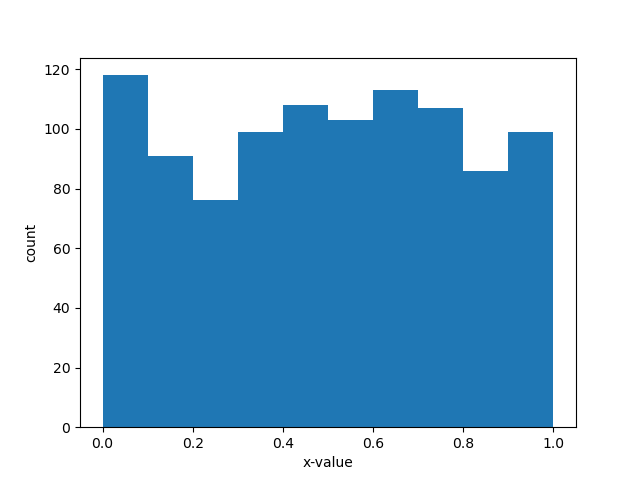

In [3]:
# create 500 samples of random number between 0 and 1.
data = random_no_table(0,1,1000)

fig = plt.figure()
plt.hist(data, bins = 10, range = (0,1))
plt.xlabel('x-value')
plt.ylabel('count')
plt.show()

A histogram was plotted to see the distribution of 1000 random numbers in the range between 0 and 1. As shown in the above graph, the distribution is quite uniform around count = 100, with minor fluctuations in individual bars. This is expected if each outcome is equally likely. Fluctuation of a bin's height is around $\sigma = \sqrt{\mu}$, $\mu$ being the mean height of a bin. This fluctuation decreases with more samples as $\mu \propto 1/N$. While this may give more accurate results, it also gives expensive computational cost as more memory space will be used for these samples.

The same random number generator is used to generate arbitrary samples of three dimensional points (x,y,z). These will then be plotted in a scatter plot. As each point has a range between 0 and 1, The modulus of vector was set in the same range.

<IPython.core.display.Javascript object>


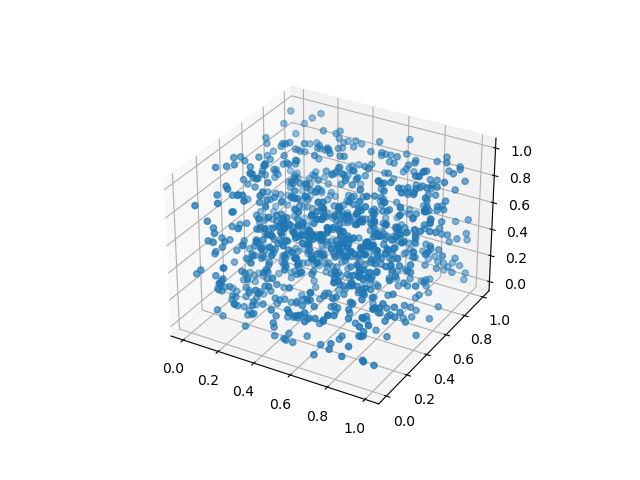

In [4]:
x = random_no_table(0,1,1000)
y = random_no_table(0,1,1000)
z = random_no_table(0,1,1000)

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x,y,z)

Here in the hyperspace, all of these points formed from random numbers are uniformly distributed across. There is no exact trend seen in these points, implying they are truly random and there are no correlations among them! This suggests that np.uniform.random() works well as an unbiased Monte Carlo sample generator.

Now we compare this with points produced by a linear congruential generator. The production of a random number by a linear congruential generator involves the following formula:

$X_{n+1} = (aX_{n} + c)  \mod  m$

$a$ and $c$ are known as the multiplier and increment respectively, whereas $m$ is referred as the modulus. The generator is based on finding the remainder of random values $X_{n}$ after processing it through a simple arithmetic using $a$ and $c$. Since the 'random' values are processed based on a deterministic algorithm, they are actually more referred as pseudo-random values. Usually, a seed $X_{0}$ is inputted to start the generator. The listed variables must have the following conditions:

$0 < m$ ;

$0 < a < m$;

$0 \leq c < m$;

$0 \leq X_{0} < m$

a psuedo-random number between 0 and 1 can then be obtained by $s_{i} = X_{n} / m$. 

In [5]:
# function for the linear congruential generator
def randssp(p,q):
    
    '''
    generates psuedo-random samples based on a linear congruential generator. The values of the modulus, multiplier, increment and seed are used below.
    '''
    global m, a, c, x_0
        
    try: x_0
    except NameError:
        m = pow(2, 31)
        a = pow(2, 16) + 3
        c = 0
        x_0 = 123456789
    
    try: p
    except NameError:
        p = 1
    try: q
    except NameError:
        q = p
    
    r = np.zeros([p,q])

    for l in range (0, q):
        for k in range (0, p):
            x_0 = np.mod(a*x_0 + c, m)
            r[k, l] = x_0/m
    
    return r

points = randssp(3, 1000)

<IPython.core.display.Javascript object>


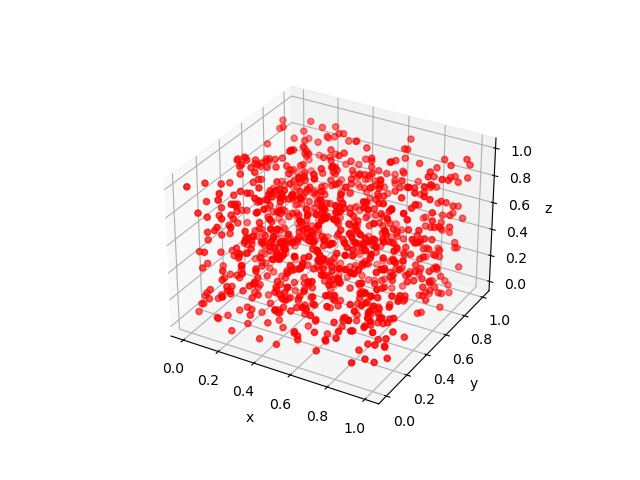

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[0, :], points[1, :], points[2, :], color='r')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()


The points generated by the linear congruential generator are plotted in the hyperspace above.
Based on the results, certain correlations can be seen on the hypersphere at a certain angle. This is catastrophic since it means the numbers generated are not truly random and will create bias results if we generate samples from this. 
The reason as to why this is the case is due to the fact that the generator has a recurrence relation in its values. These values will repeat again overtime, giving rise to the correlations seen in the hyperspace. While this can be avoided using an arbitrarily large modulus, it won't be preferrable in our monte carlo simulations as it would require around 10000 samples at best. Hence, it is better to stick with np.random.uniform() for our project.

# Finding attenuation length of water

Random numbers are now used to produce samples for an exponential distribution. The exponential distribution helps describe the probability of finding a neutron as the particle traverse through a medium and is given by $A = A_0 \exp(-\dfrac{x}{\lambda})$ where $\lambda$ is the attenuation length of the material. By using the inverse cummulation method, we can generate monte carlo samples $s_i$ with the below formula:<br>
$s_i = - \lambda \ln{u_i}$<br>
where $u_i$ is a random number between 0 and 1. If we measured the counts of our samples $s_i$ and plot it with a histogram, it would be expected to follow an exponential distribution.

In [7]:
def exponential_distribution(random_no, mean_free_path):
    '''
    generates samples based on an exponential distribution
    '''
    samples = - mean_free_path * np.log(random_no)
    return samples

mean_free_path = 45
# generate 5000 samples
no = random_no_table(0,1,5000)

<IPython.core.display.Javascript object>


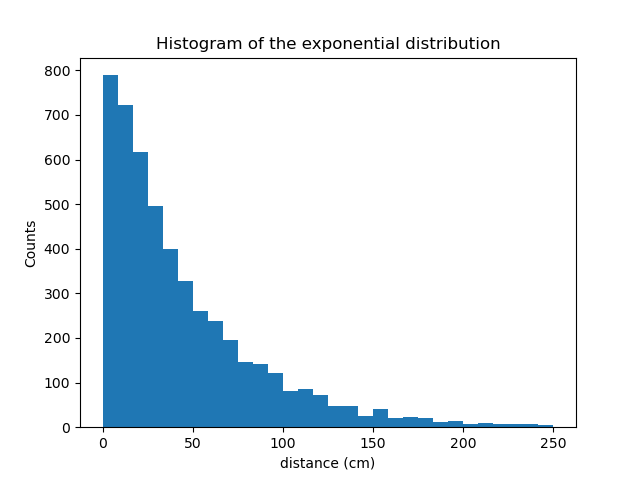

In [8]:
samples = exponential_distribution(no, mean_free_path)

fig = plt.figure()
plt.title('Histogram of the exponential distribution')
plt.xlabel('distance (cm)')
plt.ylabel('Counts')
plt.hist(samples, bins = 30, range = (0, 250))
plt.show()

The above is a histogram plotted using one set of monte carlo samples generated with an exponential distribution. Overall, the counts do follow an exponential drop across the distance as expected from the distribution we used. There are slight fluctuations in certain bins which exceeded our expected drop. 

<ipython-input-9-8bc3e23a1e6f>:2: RuntimeWarning: divide by zero encountered in log
  ydata = np.log(counts)


<IPython.core.display.Javascript object>


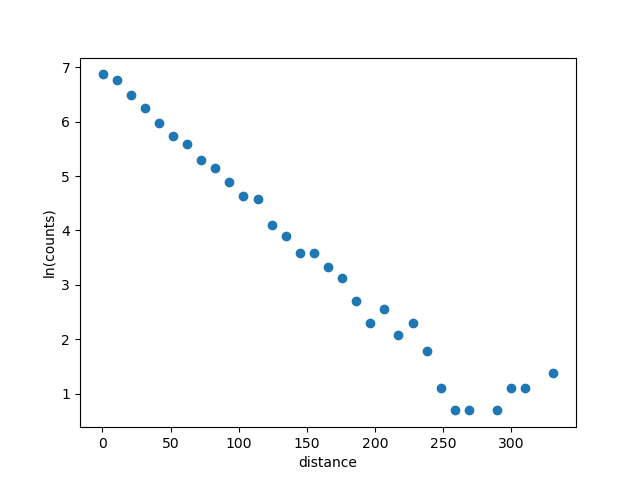

In [9]:
counts, bin_distance = np.histogram(samples, bins = 33)
ydata = np.log(counts)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(bin_distance[:-1], ydata)
ax.set_xlabel('distance')
ax.set_ylabel('ln(counts)')
plt.show()


By taking the log of counts and plotting them against distance, a linear decreasing trend can be observed but the data at large distance deviate significantly away from it. It's blatant that these data have larger fluctuations due to smaller counts based on our distribution. This is however just one dataset generated from monte carlo samples and is not conclusive to obtain our fitted attenuation length. Therefore, a mean value can be analysed by using multiple runs of monte carlo samples. By the central limit theorem, the counts of each bins follow a gaussian distribution as more runs are operated. Therefore, the attenuation length $\lambda$ can be accurately fitted by using the mean number of counts for each distance along with the standard deviation as their errors.

In [10]:
def mean_exp_analysis(mean_free_path, iterations, sample_no):
    '''
    generates monte-carlo samples for each test run and collect the mean data of counts and bin edges throughout our analysis
    '''
    # Creates dataset for count and bin-edge where we later assign datas to them
    count_dataset = np.zeros((iterations,33))
    bin_dataset = np.zeros((iterations,33))
    for iteration in range(iterations):
        no = random_no_table(0,1,sample_no)
        samples = exponential_distribution(no, mean_free_path)
        counts, bin_edges = np.histogram(samples, bins = 33, range = (0, 250))
        # Take only the first 33 bin-edges to make the data equal
        bin_edges = bin_edges[:-1]
        # assign the associated row of the dataset to the data
        count_dataset[iteration, :] = counts
        bin_dataset[iteration, :] = bin_edges
    count_mean = count_dataset.mean(axis = 0)
    count_std = count_dataset.std(axis = 0)    
    # remove any counts value that correspond to zero as we want to take the log of the counts
    count_mean = count_mean[np.where(~np.isnan(count_mean))]
    bin_edge_mean = bin_dataset.mean(axis = 0)
    return bin_edge_mean, count_mean, count_std

    
xdata, ydata, error = mean_exp_analysis(mean_free_path, 10, 10000)

Analysis results
The attenuation length is 45.026 +/- 6.892 cm
Reduced chi square of the fit is 0.13


<IPython.core.display.Javascript object>


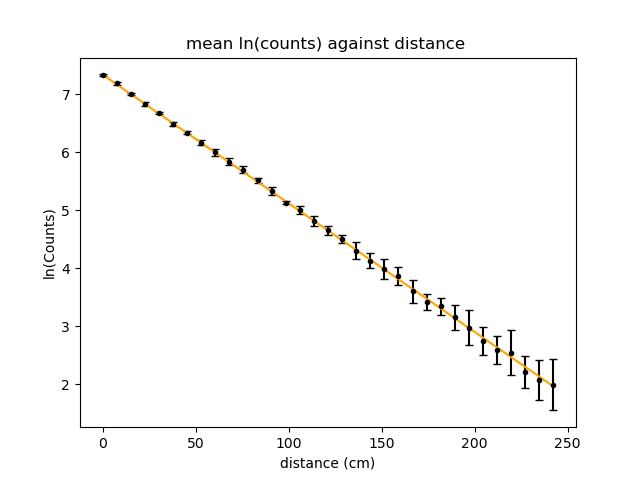

In [11]:
def log_error_calculation(ydata, error):
    '''
    calculates the log of the ydata as well as the log of the error
    '''
    log_data = np.log(ydata)
    log_error = error / ydata
    return log_data, log_error

def chi_square_analysis(observations, expectations, errors):
    '''
    calculates the reduced chi square of the fit
    '''
    diff = np.abs(expectations - observations)
    chi_square = np.sum((diff/errors) ** 2)
    dof = len(observations) - 2
    reduced_chi = chi_square / dof
    return reduced_chi

def attenuation_length_calculation(xdata, ydata, error):
    '''
    computes the analysis of the attenuation length and output the results with the chi square results. Also returns the fitted data
    '''
    # set weights as 1/ errors as larger distances have fewer counts
    popt, pcov = np.polyfit(xdata, ydata, 1, cov = True, w = 1/error)
    attenuation_length = -1/popt[0]
    length_error = np.sqrt(pcov[1,1])/ (popt[0])**2
    fitted_data = popt[0]*xdata + popt[1]
    reduced_chi = chi_square_analysis(ydata, fitted_data, error)
    print('Analysis results')
    print('=================')
    print('The attenuation length is {0:4.3f} +/- {1:4.3f} cm'.format(attenuation_length, length_error))
    print('Reduced chi square of the fit is {0:3.2f}'.format(reduced_chi))
    
    return fitted_data
    
ydata, error = log_error_calculation(ydata, error)
fitted_data = attenuation_length_calculation(xdata, ydata, error)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(xdata, ydata, yerr = error, fmt = '.', color = 'black', capsize = 3)
ax.plot(xdata, fitted_data, color = 'orange')
plt.title('mean ln(counts) against distance ')
plt.xlabel('distance (cm)')
plt.ylabel('ln(Counts)')
plt.show()

From the above graph, we can see the fit mostly runs through all our data points. Data points at large distances have a larger fluctuations due to the probability of generating our samples being low at this point. As a result, this dominates the source of our fit error. It is crucially noted that by increasing the number of samples for our test, the fit error gradually decreases. This is reasonable since by generating more samples, the counts generated at the tail ends of the distribution increases. The standard deviation is reduced based on gaussian distribution of our mean count for each distance (error $\sigma \propto \sqrt(1/N)$). Reduced chi square 
is at an acceptable level.

# Week 2: Creating random walk functions

During the second week, certain steps were made to facilitate our simulation of neutron scattering. This included generating an isotropically spherical distribution for a radial position and writing a random walk function.

# Generating isotropic unit vectors

A uniform isotropic spherical distribution was used such that the particle is equally likely to scatter in all direction after its process in the shield. This was done using a normal spherical coordinate basis with unit radius vector $\bf{r}$. <br>
$x = \sin(\theta_i)\cos(\phi_i)$<br>
$y = \sin(\theta_i)\sin(\phi_i)$<br>
$z = \cos(\theta_i)$<br>

$\theta_i$ and $\phi_i$ are monte carlo samples where $\theta_i$ is generated between 0 and $\pi$, $\phi_i$ is generated between 0 and $2\pi$. However, using a normal random number generator for $\theta$ would create a non-uniform distribution at the poles since the area of the circle in those regions are smaller. This can be solved by using an inverse cumulative function $\theta_i = \arccos{1-2u_i}$ which has low concentration regions at $u_i$ = 0 or 1. 

In [12]:
def low_concentrate_theta(random_no):
    '''
    Inverse cumulative function for our random numbers in generating the theta component of our position
    '''
    theta = np.arccos(1-2*random_no)
    return theta

def isotropic_unit_vectors(sample_no):
    '''
    Generates an isotropic uniform radial distribution for coordinates
    '''
    #theta = random_no_table(0, np.pi, sample_no)
    u_i = random_no_table(0, 1, sample_no)
    phi = random_no_table(0, np.pi * 2, sample_no)
    theta = low_concentrate_theta(u_i)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    coordinates = np.column_stack((x,y,z))
    return coordinates

<IPython.core.display.Javascript object>


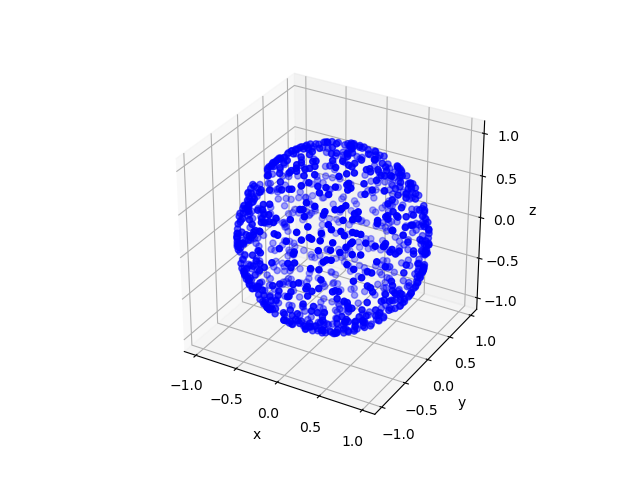

In [13]:
# Plot out the scatter plot of the coordinates
coordinates = isotropic_unit_vectors(1000)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coordinates[:,0],coordinates[:,1], coordinates[:,2], color='b')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_box_aspect(aspect = (1,1,1))
plt.show()

The plot above shows the monte carlo samples of radial position in a 3D space, which forms a sphere. As seen above, the distribution of the samples is uniform over the sphere. No correlation can be seen which is a good sign that the samples have no bias.

# Generate isotropic steps with exponential distribution

With the use of isotropic radial distribution function along with the exponential distribution function, the history of particle's path can be constructed. In our model, the particle repeatedly moves to a new point until a new scattering event occurs. The distance it travels can be modelled by the exponential probability distribution $P_{i} = \exp\left({x/\lambda}\right)$. The direction it takes is obtained from the samples generated using our isotropic radial distribution.

In [14]:
def scatter_step(sample_no, mean_free_path):
    '''
    creates an isotropic step with direction based on the radial isotropic distribution and magnitude based on your 
    exponential distribution
    '''
    # first, generate the direction
    direction = isotropic_unit_vectors(sample_no)
    random_no = random_no_table(0,1, sample_no)
    magnitude = exponential_distribution(random_no, mean_free_path)
    #new_step = magnitude * direction
    x_array = direction[:,0] * magnitude
    y_array = direction[:,1] * magnitude
    z_array = direction[:,2] * magnitude
    return x_array, y_array, z_array

By plotting out the positions each particle takes, we would expect to see a random walk trajectory in a 3D plot where the particle drifts further away from the origin.

In [15]:
# starting position is the origin
def random_walk(mean_free_path):
    '''
    generates a history of positions the particle travels after 20 scattering events. scatter_step() was used to
    create the next step it takes after a scattering event.
    '''
    position = np.zeros((1,3))
    position_points = np.zeros((20,3))
    #set initial index as position on origin
    position_points[0] = position
    for step in range(1, len(position_points)):
        x_step, y_step, z_step = scatter_step(1, mean_free_path)
        position[0,0] += x_step
        position[0,1] += y_step
        position[0,2] += z_step
        position_points[step] = position
    return position_points

# create different walking paths with different mean paths
walk_45 = random_walk(45)
walk_20 = random_walk(20)
walk_10 = random_walk(10)

<IPython.core.display.Javascript object>


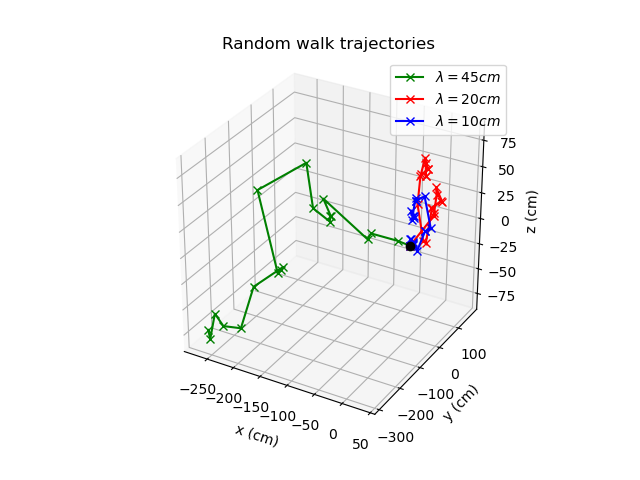

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(walk_45[:,0], walk_45[:,1], walk_45[:,2], color='g', marker = 'x', label = r'$\lambda = 45cm$')
ax.plot(walk_20[:,0], walk_20[:,1], walk_20[:,2], color='r', marker = 'x', label = r'$\lambda = 20cm$')
ax.plot(walk_10[:,0], walk_10[:,1], walk_10[:,2], color='b', marker = 'x', label = r'$\lambda = 10cm$')
ax.set_title('Random walk trajectories')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_zlabel('z (cm)')
ax.plot(0,0,0, color = 'black', marker = 'o')
ax.set_box_aspect(aspect = (1,1,1))
ax.legend()
plt.show()

The above 3d plot shows the history of the particle 's path with varying attenuation length between 10 cm, 20cm, 45 cm. The trajectory of the particle corresponds to a random walk, which is expected as the particle moves equally likely in all directions. As seen from the graph, the walk with $\lambda = 10$ cm has a shorter range compared to the other higher paths. This is due to attenuation length being smaller. As a result, the likelihood that the particle drifts off at a faraway distance is small compared to 45 cm.

# Weeks 3-5: Simulation of neutron penetration through a shield

After the preliminary work in testing random samples and creating random walk functions were done, the crux of the project was finally initiated.

The transmission of a neutron through a material is a very complicated process as it involves the scattering or absorption of the neutron. A neutron can have three outcomes, one is that the particle is absorbed while the other two being it is transmitted out or reflected. These outcomes are dependent by the properties of the material used in the shield.

Given an area of slab, the probability the particle is absorbed or scattered is dependent on the portion of particles undergoing their associated process over a certain area. The number density $n$ is obtained by the following formula:

$n = \dfrac{\rho N_A}{m}$

$m$ is the molar mass of the material. $\rho$ is the density of the material and $N_A$ is the avogadro constant. If we are given the microscopic absorption and scattering cross sections $\sigma_a$, $\sigma_s$, we can calculate their macroscopic counter-parts. 

$\Sigma_A = n\sigma_a$     $\Sigma_S = n \sigma_s$

The mean-free path of the neutron and the absorption probability is then given as follows:

$\lambda = \dfrac{1}{\Sigma_A + \Sigma_s}$ $P_A = \dfrac{\Sigma_A}{\Sigma_A + \Sigma_S}$

Therefore, the probability that the neutrons get absorbed is dependent on its absorption and scattering cross-section. Water's corresponding cross-sections are high, so the number of neutrons reflected and absorbed in it will be high compared to absorbed. Conversly, graphite's cross section and density is relatively smaller, so the number of transmitted fraction is higher in comparison to absorbed and reflected. Density $n$ also plays a factor as it tells how dense the material is for the neutrons to penetrate through.

In this simulation, water, lead and graphite were used. Thermal neutron data was given as follows:


| | Water | Lead | Graphite|
|---|---|---|---|
| $\sigma_a$ (barn)|0.6652 |0.158|0.0045|
| $\sigma_s$ (barn)| 103.0 |11.221|4.74|
|$\rho$ (g/cm$^3$)|1.00|11.35|1.67|

In [17]:
import scipy.constants as sc

def absorption_calculation(density, molar_mass, absorption_cs, scattering_cs):
    '''
    computes the total mean free path and absorbtion probability for scattering and absorbtion process
    '''
    barn = 1e-28 * 1e4
    absorption_cs = absorption_cs * barn
    scattering_cs = scattering_cs * barn
    n = density * sc.Avogadro / molar_mass
    absorption_prob = (n * absorption_cs)/ (n * absorption_cs + n * scattering_cs)
    mean_free_path = 1/ (n * absorption_cs + n * scattering_cs)
    return mean_free_path, absorption_prob

WATER_ABSORPTION = 0.6652
WATER_SCATTERING = 103.0
WATER_DENSITY = 1.00
WATER_MOLAR_MASS = 18.01

water_mfp, water_absorpprob = absorption_calculation(WATER_DENSITY, WATER_MOLAR_MASS, WATER_ABSORPTION, WATER_SCATTERING)

In [18]:
LEAD_ABSORPTION = 0.158
LEAD_SCATTERING = 11.221
LEAD_DENSITY = 11.35
LEAD_MOLAR_MASS = 207.2

GRAPHITE_ABSORPTION = 0.0045
GRAPHITE_SCATTERING = 4.74
GRAPHITE_DENSITY = 1.67
GRAPHITE_MOLAR_MASS = 12.011


lead_mfp, lead_absorpprob = absorption_calculation(LEAD_DENSITY, LEAD_MOLAR_MASS, LEAD_ABSORPTION, LEAD_SCATTERING)
graphite_mfp, graphite_absorpprob = absorption_calculation(GRAPHITE_DENSITY, GRAPHITE_MOLAR_MASS, GRAPHITE_ABSORPTION, GRAPHITE_SCATTERING)

In [19]:
print("Water's mean free path and absorbtion probability is {0:3.2f} cm and {1:4.3f}".format(water_mfp, water_absorpprob))
print("Lead's mean free path and absorbtion probability is {0:3.2f} cm and {1:4.3f}".format(lead_mfp, lead_absorpprob))
print("Graphite's mean free path and absorbtion probability is {0:3.2f} cm and {1:4.3f}".format(graphite_mfp, graphite_absorpprob))

Water's mean free path and absorbtion probability is 0.29 cm and 0.006
Lead's mean free path and absorbtion probability is 2.66 cm and 0.014
Graphite's mean free path and absorbtion probability is 2.52 cm and 0.001


From our calculation above, we can see that water has the shortest mean free path while lead and graphite have similiar mean free paths of neutrons. The absorbtion probability for all three is small due to the small absorbtion probability they have.

# Markov chain scattering algorithm

In our code of the simulation, a markov chain was adopted in the neutron's transmission, which the outcome is dependent on the probability of state our sample takes (in this case, the random number generated). In the chain, the particle firstly moves incidentally based on an exponential distribution until it stops. It is either absorbed or scattered based on the random no generated between 0 and 1. If this number is smaller than the absorption probability $P_i$, then it gets absorbed and the chain stops. Otherwise the neutron moves to a new position where a check of the x- position is conducted. Assuming the model has a slab of length L on the x-axis and the origin is located on the incident wall, If the x-position of the neutron is below x = 0, then the neutron is deemed reflected. Conversely, if x > L, the neutron is transmitted. In both cases, the chain stops. Otherwise, the particle keeps on scattering inside until it satisfies one of the above condition.

In [20]:
# first set the initial surface of the slab as x = 0
#set exponential distribution to first step

SLAB_LENGTH = 10

def initial_travel(mean_free_path):
    '''
    calculates the initial travel distance of the particle when it penetrates the slab
    '''
    position = np.zeros((1,3))
    random_no = random_no_table(0, 1, 1)
    initial_step = exponential_distribution(random_no, mean_free_path)
    position[0,0] = initial_step
    return position

def scattering_process(mean_free_path, absorb_prob,slab_length, record = False):
    '''
    runs a Markov chain algorithm that determines whether our particle is transmitted, reflected or absorbed
    '''
    position = initial_travel(mean_free_path)
    x = position[0,0]
    is_absorbed = False
    if record is True:
        particle_history = np.zeros((1,3))
        particle_history = np.vstack((particle_history, position))
    else:
        particle_history = None

    absorb_count = 0
    reflect_count = 0
    transmitted_count = 0
    
    while 0 < x < slab_length:
        prob = random_no_table(0, 1, 1)
        if prob < absorb_prob:
            is_absorbed = True
            break
        else:
            new_step = np.concatenate(scatter_step(1, mean_free_path))
            position += new_step
            if record is True:
                particle_history = np.vstack((particle_history, position))
            x = position[0,0]
    if is_absorbed == True:
        absorb_count = 1
    else:
        if x < 0:
            reflect_count = 1
        else:
            transmitted_count = 1
    return absorb_count, reflect_count, transmitted_count, particle_history


In [21]:
def record_history(mfp, absorb_prob, N):
    '''
    record the particle's history of absorbed, transmitted, and reflected processes by checking through the runs of the scattering process 
    '''
    record_reflect = False
    record_absorb = False
    record_transmit = False
    for _ in range(N):
        absorb_count, reflect_count, transmitted_count, particle_history = scattering_process(mfp, absorb_prob, SLAB_LENGTH, record = True)
        if reflect_count == 1 and record_reflect is False:
            reflect_history = particle_history
            record_reflect == True
        if absorb_count == 1 and record_absorb is False:
            absorb_history = particle_history
            record_absorb == True
        if transmitted_count == 1 and record_transmit is False:
            transmit_history = particle_history
            record_transmit == True
        if record_reflect == True and record_transmit == True and record_absorb == True:
            break
    return reflect_history, absorb_history, transmit_history

reflect_history, absorb_history, transmit_history = record_history(water_mfp, water_absorpprob, 1000)


# Plotting the particle histories of each material

As a check for our algorithm to work, an extra function is added to record the history of particles as they travel through the slab. The path of transmission, reflection and absorption are selectively chosen for each material. These paths are plotted in the graphs below.

<IPython.core.display.Javascript object>


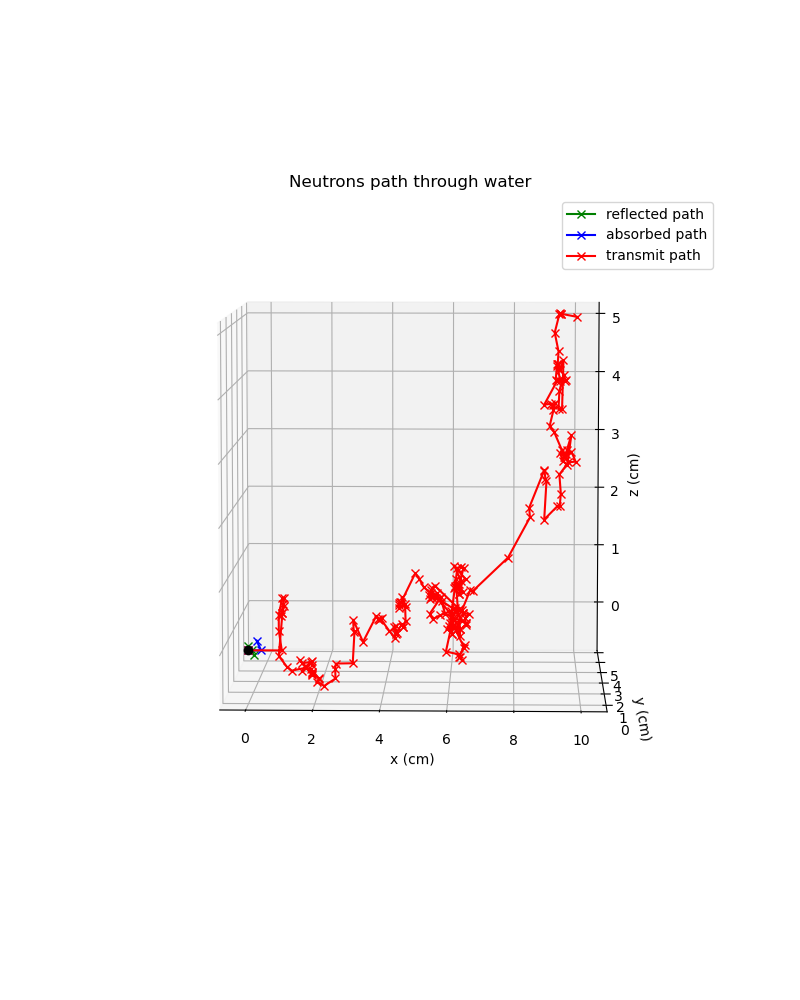

In [22]:
fig = plt.figure(figsize = (8,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(reflect_history[:,0], reflect_history[:,1], reflect_history[:,2], color ='g', marker = 'x', label = 'reflected path')
ax.plot(absorb_history[:,0], absorb_history[:,1], absorb_history[:,2], color ='b', marker = 'x', label = 'absorbed path')
ax.plot(transmit_history[:,0], transmit_history[:,1], transmit_history[:,2], color ='r', marker = 'x', label = 'transmit path')
ax.plot(0,0,0, color = 'black', marker = 'o')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_zlabel('z (cm)')
ax.set_title('Neutrons path through water')
ax.set_box_aspect(aspect = (1,1,1))
ax.legend()
plt.show()

As seen above, the paths for neutrons in water consists the most random walks, specifically transmission and reflection. This is expected since water is a good reflector material with small mean free path. Therefore, it is quite hard for the neutrons to pass through water itself. 

<IPython.core.display.Javascript object>


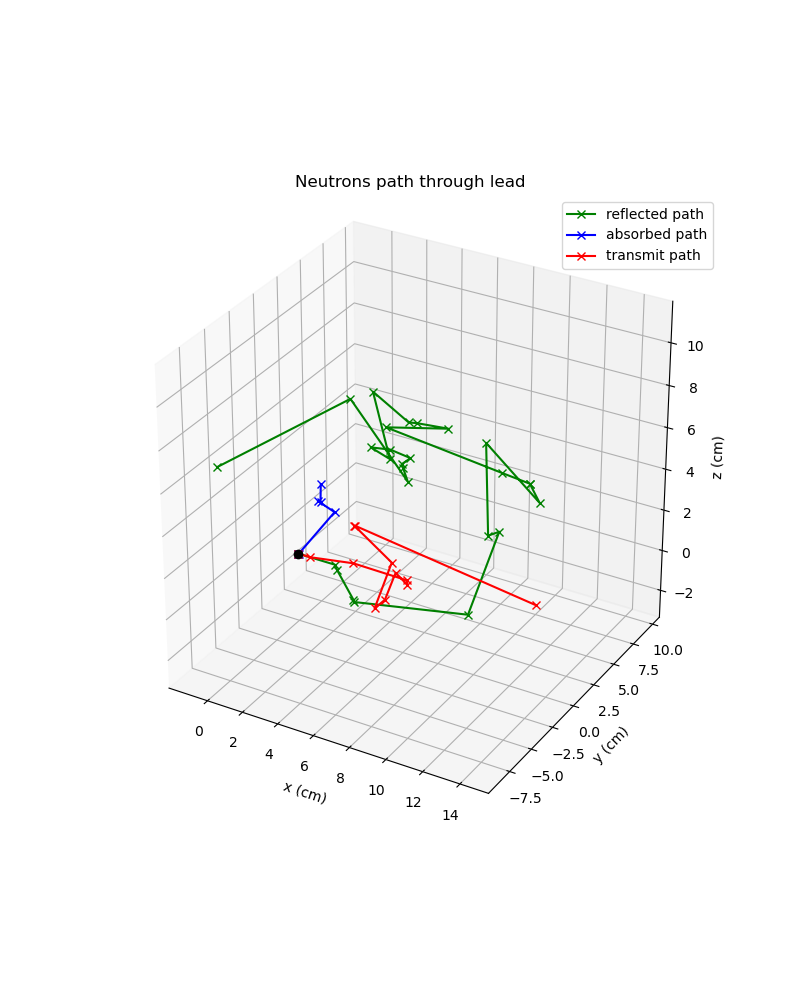

In [23]:
reflect_history, absorb_history, transmit_history = record_history(lead_mfp, lead_absorpprob, 1000)

fig = plt.figure(figsize = (8,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(reflect_history[:,0], reflect_history[:,1], reflect_history[:,2], color ='g', marker = 'x', label = 'reflected path')
ax.plot(absorb_history[:,0], absorb_history[:,1], absorb_history[:,2], color ='b', marker = 'x', label = 'absorbed path')
ax.plot(transmit_history[:,0], transmit_history[:,1], transmit_history[:,2], color ='r', marker = 'x', label = 'transmit path')
ax.plot(0,0,0, color = 'black', marker = 'o')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_zlabel('z (cm)')
ax.set_title('Neutrons path through lead')
ax.set_box_aspect(aspect = (1,1,1))
ax.legend()
plt.show()

The graph for lead shows similiar random paths to water, only the individual scatterings are more spread out. This was expected considering lead has a longer mean-free path then water.

<IPython.core.display.Javascript object>


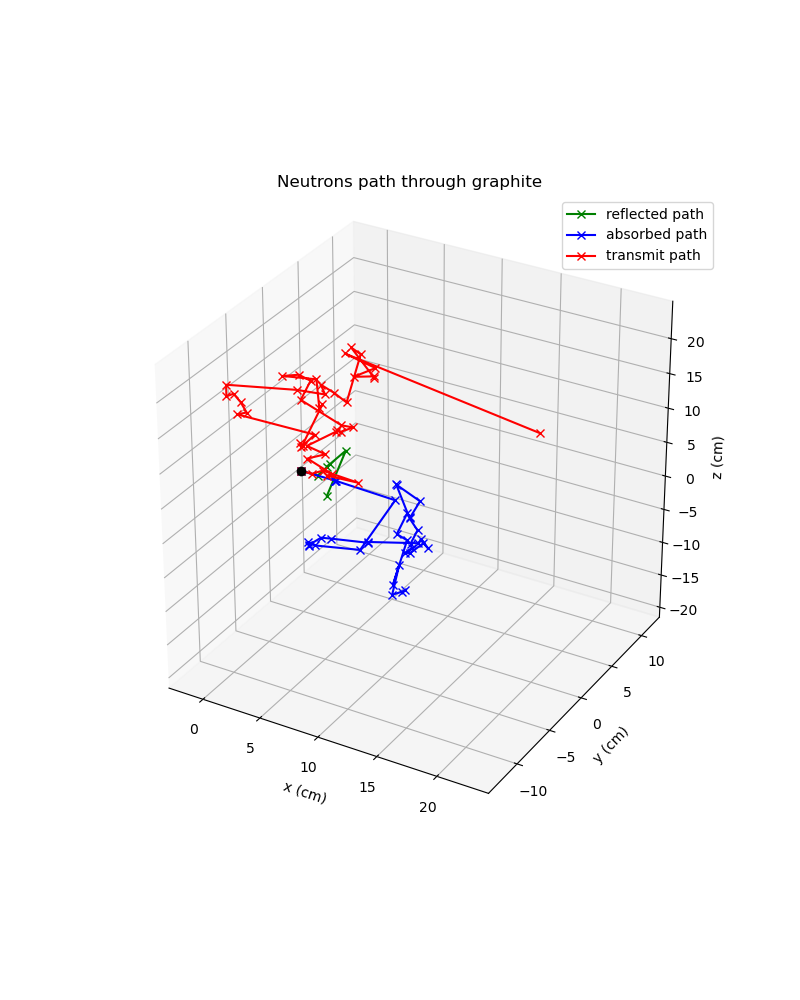

In [24]:
reflect_history, absorb_history, transmit_history = record_history(graphite_mfp, graphite_absorpprob, 1000)

fig = plt.figure(figsize = (8,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(reflect_history[:,0], reflect_history[:,1], reflect_history[:,2], color ='g', marker = 'x', label = 'reflected path')
ax.plot(absorb_history[:,0], absorb_history[:,1], absorb_history[:,2], color ='b', marker = 'x', label = 'absorbed path')
ax.plot(transmit_history[:,0], transmit_history[:,1], transmit_history[:,2], color ='r', marker = 'x', label = 'transmit path')
ax.plot(0,0,0, color = 'black', marker = 'o')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_zlabel('z (cm)')
ax.set_title('Neutrons path through graphite')
ax.set_box_aspect(aspect = (1,1,1))
ax.legend()
plt.show()

The plot for graphite also shows similiar results to lead, with a medium mean free path. All these plots have shown our markov algorithm to be working properly.

# collecting data of transmission, reflectance and absorption of the neutrons through the slab

The results of transmission is crucially important as it shows how sturdy our material is in successively stopping neutron transport through our shield. The smaller the transmission, the more effective that material is in stopping the nuclear fission process from becoming unstable.

Using the function we write, the individual counts of each process can be tallied up to give the total results for one monte carlo simulation. Percentage of transmission, reflection and absorption is $\dfrac{N_T}{N}$, $\dfrac{N_R}{N}$, $\dfrac{N_A}{N}$, where the error is given to be $\sqrt{N_T}$. The fraction of each processes gives us a good idea as to the material's property in blocking neutron transmission. Multiple monte carlo results were carried out to obtain the mean results and standard deviation as our error.

In [25]:
def tally_result(mean_free_path, absorb_prob, slab_length):
    '''
    Tally up the results of transmission of neutrons for one single monte carlo simulation. (N = 10000)
    '''
    N = 10000
    absorb_result = 0
    reflect_result = 0
    transmitted_result = 0
    for _ in range(N):
        absorb_count, reflect_count, transmitted_count = scattering_process(mean_free_path, absorb_prob, slab_length)[:3]
        absorb_result += absorb_count
        reflect_result += reflect_count
        transmitted_result += transmitted_count
        results = np.array([absorb_result, transmitted_result, reflect_result])
    return results

def monte_carlo_mean_results(mfp, absorbprob, slab_length):
    '''
    collects the mean result of 10 runs of monte carlo simulations
    '''
    results = np.zeros((10, 3))
    for trial in range(10):
        results[trial, :] = tally_result(mfp, absorbprob, slab_length)
    mean_results = results.mean(axis = 0)
    results_std = results.std(axis = 0)
    # collects all the related mean results and standard deviation
    mean_absorb_result = int(mean_results[0])
    mean_transmitted_result = int(mean_results[1])
    mean_reflect_result = int(mean_results[2])
    mean_absorb_error = results_std[0]
    mean_transmitted_error = results_std[1]
    mean_reflect_error = results_std[2]
    return mean_absorb_result, mean_reflect_result, mean_transmitted_result, mean_absorb_error, mean_reflect_error, mean_transmitted_error

def calculate_fraction(absorb, reflect, transmit, absorb_error, reflect_error, transmit_error):
    '''
    calculate the fractions of absorb, reflect, and transmitted as well as its error
    '''
    absorb_fraction = absorb / 10000
    reflect_fraction = reflect / 10000
    transmitted_percent = transmit/ 10000
    absorb_error_percent = absorb_error/10000
    reflect_error_percent = reflect_error/10000
    transmitted_error_percent = transmit_error/10000 
    
    return absorb_fraction, reflect_fraction, transmitted_percent, absorb_error_percent, reflect_error_percent, transmitted_error_percent

def print_results(material, absorb_result, reflect_result, transmitted_result, absorb_error, reflect_error, transmit_error):
    '''
    outputs all the results and associated errors in a neat format.
    '''
    absorb_fraction, reflect_fraction, transmitted_fraction, absorb_error, reflect_error, transmit_error = calculate_fraction(absorb_result, reflect_result, transmitted_result, absorb_error, reflect_error, transmit_error)
    
    print('-----------------------------------------------------')
    print(f'Transmission through a Fixed Thickness - {material}')
    print('-----------------------------------------------------')
    print('Thickness: 10.00 cm')
    print('Total Neutron: 10000')
    print(f'Neutron absorbed: {absorb_result}')
    print(f'Neutron reflected: {reflect_result}')
    print(f'Neutron transmitted: {transmitted_result}')
    print('fraction absorbed: {0:4.3f} +/- {1:4.3f} '.format(absorb_fraction, absorb_error))
    print('fraction reflected: {0:4.3f} +/- {1:4.3f}'.format(reflect_fraction, reflect_error))
    print('fraction transmitted: {0:5.4f} +/- {1:5.4f}'.format(transmitted_fraction, transmit_error))

# Result for water

It takes around 3 min to obtain the mean monte-carlo results for water. 
Water's runtime is the longest considering its mean free path is short and the extent of scattering is large compared to other materials. This expands the running time since we need to calculate a new position each time.

In [26]:
water_mean_absorb, water_mean_reflect, water_mean_transmitted, water_absorb_err, water_reflect_err, water_transmit_error = monte_carlo_mean_results(water_mfp, water_absorpprob, SLAB_LENGTH)
print_results('Water', water_mean_absorb, water_mean_reflect, water_mean_transmitted, water_absorb_err, water_reflect_err, water_transmit_error)

-----------------------------------------------------
Transmission through a Fixed Thickness - Water
-----------------------------------------------------
Thickness: 10.00 cm
Total Neutron: 10000
Neutron absorbed: 2021
Neutron reflected: 7947
Neutron transmitted: 31
fraction absorbed: 0.202 +/- 0.003 
fraction reflected: 0.795 +/- 0.003
fraction transmitted: 0.0031 +/- 0.0005


From water's results, the transmitted fraction is significantly small, compared to absorbed fraction and reflected fraction. This was just as expected initially with water being a good reflector. Water's absorption and scattering cross section is high, so the fraction of absorbed and reflected is considerably higher than the rest. The reflected fraction is estimated around 80% for thickness of 10 cm. The large reflectance however also means the rate of neutrons transmission is significantly decreased, making it harder to create a sustainable nuclear fission process from carrying on.

# Lead's results

The function takes around 1 min to finish.

In [27]:
lead_absorb, lead_reflect, lead_transmitted, lead_absorb_err, lead_reflect_err, lead_transmit_error = monte_carlo_mean_results(lead_mfp, lead_absorpprob, SLAB_LENGTH)
print_results('Lead', lead_absorb, lead_reflect, lead_transmitted, lead_absorb_err, lead_reflect_err, lead_transmit_error)

-----------------------------------------------------
Transmission through a Fixed Thickness - Lead
-----------------------------------------------------
Thickness: 10.00 cm
Total Neutron: 10000
Neutron absorbed: 1004
Neutron reflected: 6205
Neutron transmitted: 2789
fraction absorbed: 0.100 +/- 0.002 
fraction reflected: 0.621 +/- 0.003
fraction transmitted: 0.2789 +/- 0.0027


Lead's result shows the transmitted fraction to be around 28% and reflected percentage to be 61%. Absorbed fraction is quite small. Lead's result shows that it is not quite as attenuative as water, and allows more transmission of thermal neutrons. This property makes them a good material to be used in moderators.

# Graphite's result

Function takes around 1 min to run.

In [28]:
graphite_absorb, graphite_reflect, graphite_transmitted, g_absorb_err, g_reflect_err, g_transmit_error = monte_carlo_mean_results(graphite_mfp, graphite_absorpprob, SLAB_LENGTH)
print_results('Graphite', graphite_absorb, graphite_reflect, graphite_transmitted, g_absorb_err, g_reflect_err, g_transmit_error)

-----------------------------------------------------
Transmission through a Fixed Thickness - Graphite
-----------------------------------------------------
Thickness: 10.00 cm
Total Neutron: 10000
Neutron absorbed: 84
Neutron reflected: 6832
Neutron transmitted: 3082
fraction absorbed: 0.008 +/- 0.001 
fraction reflected: 0.683 +/- 0.005
fraction transmitted: 0.3082 +/- 0.0046


Graphite's results shows the transmitted fraction to be around 31 %. Absorbed fraction is much smaller than that in Lead. While certain neutrons are absorbed, a fair amount of them is slowed and transmitted. Similiar to lead, this implies that the rate of neutron transmission can be controlled and sustained, which makes graphite an appealing material used in moderators.

# Conclusion on preliminary results and code performance

The results of transmission performance of neutrons were overall satisfactory in the thickness of 10cm. Each results aligned to what we expect in our theory. However, it is implied that the computing performance is not efficient based on our code runtime. For water, it takes at least 3 min for our code to output the results for just one mean monte carlo simulation. This is due to the fact that our preliminary code iterates an individual neutrons markov chain for all 10000 neutrons. As a result, this is not adversary if we want to investigate the charactistic length over varying thickness. Computing that requires at least 25 minutes to output the results and it is necessary to modify our code if we want quicker results.

# Modifying the monte carlo simulation

The most significant change to be made to our code is to have our function go through numerous results simultaneously instead of iterating through each one individually. The solution to this is using a numpy.array object and reduce its sizes overtime. This type of method is common in computer science and many modern data software application.

In [29]:
def mod_initial_travel(mean_free_path, vectors):
    '''
    calculates the initial travel distance of the particle when it penetrates the slab
    '''
    random_no = random_no_table(0, 1, len(vectors))
    initial_step = exponential_distribution(random_no, mean_free_path)
    vectors[:,0] = initial_step
    return vectors

In [30]:
def modified_monte_carlo_simulation(mean_free_path, absorb_prob, slab_length, n, history = False):
    '''
    runs a new effective Markov algorithm that determines the particle's outcome by considering its x position
    using numpy arrays
    '''
    # generates vectors with different initial x
    positions = np.zeros((n,3))
    positions = mod_initial_travel(mean_free_path, positions)
    
    # set the initial counts to zero 
    absorb_count = 0
    reflect_count = 0
    transmitted_count = 0

    
    x = positions[:,0]
    
    
    while len(x) > 0:
        prob = random_no_table(0, 1, len(x))
        # First the function checks which index has a probability lower than the absorbtion probability, 
        # and add the number of indexes to our absorb count.
        absorbtion_index = np.where(prob < absorb_prob)
        absorb_count += len(x[absorbtion_index])
        # The absorbed index will be then deleted from our whole x-position data
        x = np.delete(x, absorbtion_index)
        
        # A new step is added to the array of data which have a higher probability of scattering
        new_step = scatter_step(len(x), mean_free_path)[0]
        x += new_step
            
        # The same procedure is done for reflection
        reflected_index = np.where(x<0)
        reflect_count += len(x[reflected_index])
        x = np.delete(x, reflected_index)
        
        # Finally, the procedure is done for transmitted data 
        transmit_index = np.where(x> slab_length)
        transmitted_count += len(x[transmit_index])
        x = np.delete(x, transmit_index)
        # This chain will continue to run until there is no data left in the structure
    
    return absorb_count, reflect_count, transmitted_count

In [31]:
def mod_monte_carlo_mean_results(mfp, absorbprob, slab_length, neutron_no):
    '''
    outputs the mean results and errors using the new monte carlo method.
    '''
    results = np.zeros((10, 3))
    # assigns the result of each individual monte carlo simulation to the index of the result array
    for trial in range(10):
        results[trial, :] =  modified_monte_carlo_simulation(mfp, absorbprob, slab_length, neutron_no)
    mean_results = results.mean(axis = 0)
    results_std = results.std(axis = 0)

    mean_absorb_result = int(mean_results[0])
    mean_transmitted_result = int(mean_results[2])
    mean_reflect_result = int(mean_results[1])
    
    mean_absorb_error = results_std[0]
    mean_transmitted_error = results_std[2]
    mean_reflect_error = results_std[1]
    return mean_absorb_result, mean_reflect_result, mean_transmitted_result, mean_absorb_error, mean_reflect_error, mean_transmitted_error


# Updated results 

The modified code was run and each line now takes around 10 seconds to finish. Not only does this show that the runtime is significantly reduced, but it also shows how efficient our code has become. We will therefore use this new code to perform the analysis on varying the thickness length.

In [32]:
water_mean_absorb, water_mean_reflect, water_mean_transmitted, water_absorb_error, water_reflect_error, water_transmit_error = mod_monte_carlo_mean_results(water_mfp, water_absorpprob, SLAB_LENGTH, 10000)
print_results('Water', water_mean_absorb, water_mean_reflect, water_mean_transmitted, water_absorb_error, water_reflect_error, water_transmit_error)

-----------------------------------------------------
Transmission through a Fixed Thickness - Water
-----------------------------------------------------
Thickness: 10.00 cm
Total Neutron: 10000
Neutron absorbed: 2024
Neutron reflected: 7942
Neutron transmitted: 33
fraction absorbed: 0.202 +/- 0.003 
fraction reflected: 0.794 +/- 0.004
fraction transmitted: 0.0033 +/- 0.0005


In [33]:
lead_absorb, lead_reflect, lead_transmitted, lead_absorb_error, lead_reflect_error, lead_transmit_error = mod_monte_carlo_mean_results(lead_mfp, lead_absorpprob, SLAB_LENGTH, 10000)
print_results('Lead', lead_absorb, lead_reflect, lead_transmitted, lead_absorb_error, lead_reflect_error, lead_transmit_error)

-----------------------------------------------------
Transmission through a Fixed Thickness - Lead
-----------------------------------------------------
Thickness: 10.00 cm
Total Neutron: 10000
Neutron absorbed: 1006
Neutron reflected: 6192
Neutron transmitted: 2800
fraction absorbed: 0.101 +/- 0.002 
fraction reflected: 0.619 +/- 0.004
fraction transmitted: 0.2800 +/- 0.0043


In [34]:
graphite_absorb, graphite_reflect, graphite_transmitted, graphite_absorb_error, graphite_reflect_error, graphite_transmit_error = mod_monte_carlo_mean_results(graphite_mfp, graphite_absorpprob, SLAB_LENGTH, 10000)
print_results('Graphite', graphite_absorb, graphite_reflect, graphite_transmitted, graphite_absorb_error, graphite_reflect_error, graphite_transmit_error)

-----------------------------------------------------
Transmission through a Fixed Thickness - Graphite
-----------------------------------------------------
Thickness: 10.00 cm
Total Neutron: 10000
Neutron absorbed: 78
Neutron reflected: 6867
Neutron transmitted: 3053
fraction absorbed: 0.008 +/- 0.001 
fraction reflected: 0.687 +/- 0.004
fraction transmitted: 0.3053 +/- 0.0040


Here a modified code was used without recording the history of particles. Since our code uses the same functions for creating new steps from scattering and our previous code shows the path of the particles to be working, these features were not added into the new code. The results outputted for each material is the same as the previous code, so this implies our code still produces consistent and possibly accurate results. Naturally, this also means the path of particles will be somewhat similiar to our old code.

# Analysis on the errors by varying Monte Carlo sample size

In [35]:
def square_root_fit(neutron_no, y):
    '''
    performs a square_root_fit over our collected data of the errors
    '''
    x = 1/ np.sqrt(neutron_no)
    popt = np.polyfit(x, y, 1)
    fitted_data = popt[0]* x + popt[1]
    return fitted_data


def error_collection(mfp, absorbprob, material):
    '''
    collects the absorbed, reflected and transmitted errors over varying size of neutron samples. The results
    are plotted out in a graph with a square root trend line over our data.
    '''
    neutron_no = np.linspace(100, 1000, 10)
    absorb_data = np.zeros((10, 1))
    reflect_data = np.zeros((10, 1))
    transmit_data = np.zeros((10, 1))
    for i, no in enumerate(neutron_no):
        absorb_error, reflect_error, transmit_error = mod_monte_carlo_mean_results(mfp, absorbprob, SLAB_LENGTH, int(no))[3:6]
        absorb_error = absorb_error/no
        reflect_error = reflect_error/no
        transmit_error = transmit_error/no
        absorb_data[i] = absorb_error
        reflect_data[i] = reflect_error
        transmit_data[i] = transmit_error
        
    fitted_absorb = square_root_fit(neutron_no, absorb_data)
    fitted_reflect = square_root_fit(neutron_no, reflect_data)
    fitted_transmitted = square_root_fit(neutron_no, transmit_data)

    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(131)
    ax.set_title(f'Absorbed error over {material}')
    ax.plot(neutron_no, absorb_data, 'x-', label = 'absorb_error', color = 'blue')
    ax.plot(neutron_no, fitted_absorb, '--')
    ax.set_xlabel('Neutron samples')
    ax.set_ylabel('number fraction')
    ax.grid()
    ax.legend()
    ax = fig.add_subplot(132)
    ax.set_title(f'Reflected error over {material}')
    ax.plot(neutron_no, reflect_data, 'x-', label = 'reflect_error', color = 'orange')
    ax.plot(neutron_no, fitted_reflect, '--')
    ax.set_xlabel('Neutron samples')
    ax.set_ylabel('number fraction')
    ax.grid()
    ax.legend()
    ax = fig.add_subplot(133)
    ax.set_title(f'Transmitted error over {material}')
    ax.plot(neutron_no, transmit_data, 'x-', label = 'transmit_error', color = 'green')
    ax.plot(neutron_no, fitted_transmitted, '--')
    ax.set_xlabel('Neutron samples')
    ax.set_ylabel('number fraction')
    ax.grid()
    ax.legend()
    plt.tight_layout()
    plt.show()


<IPython.core.display.Javascript object>


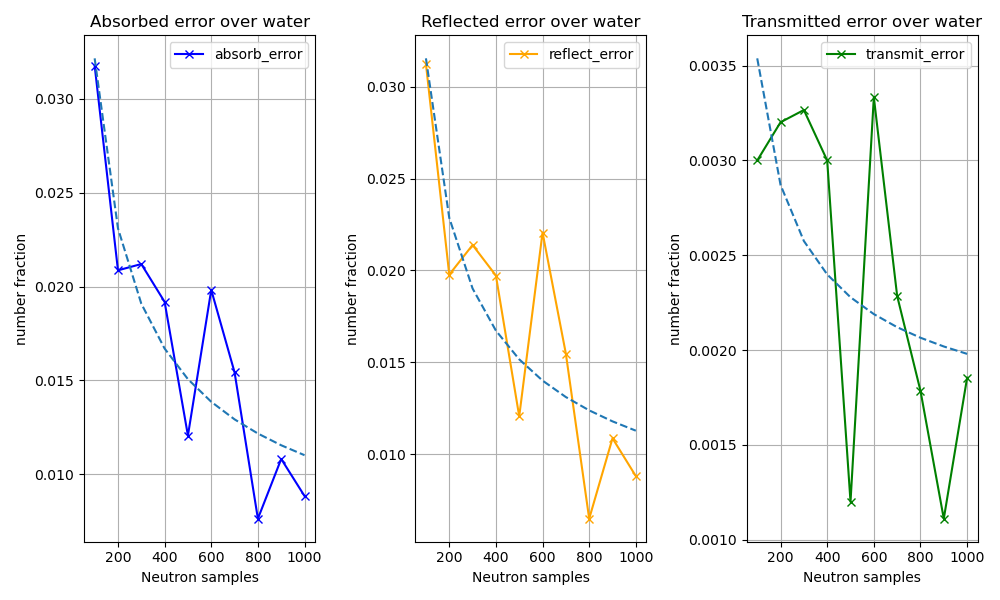

<IPython.core.display.Javascript object>


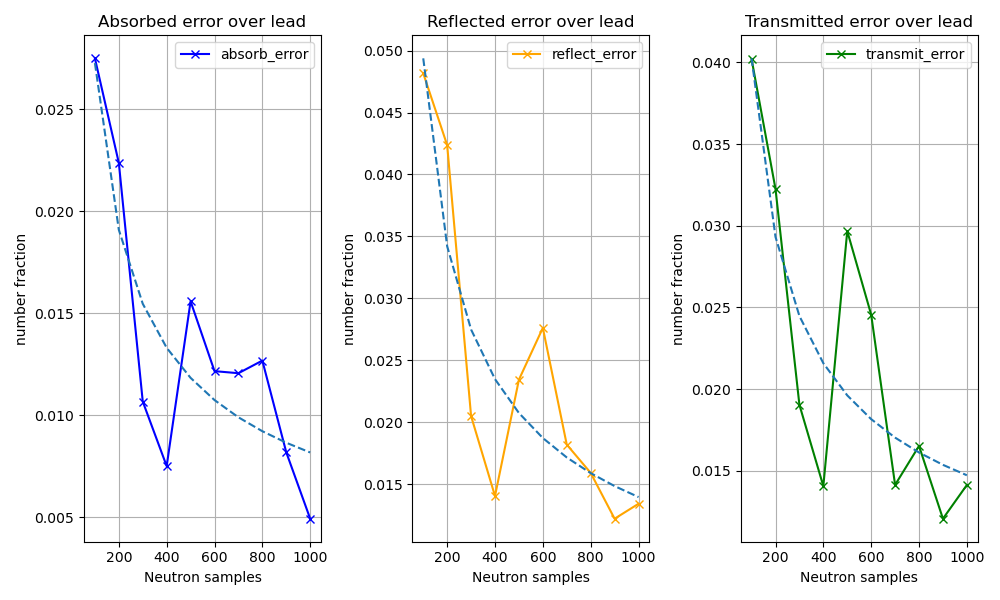

<IPython.core.display.Javascript object>


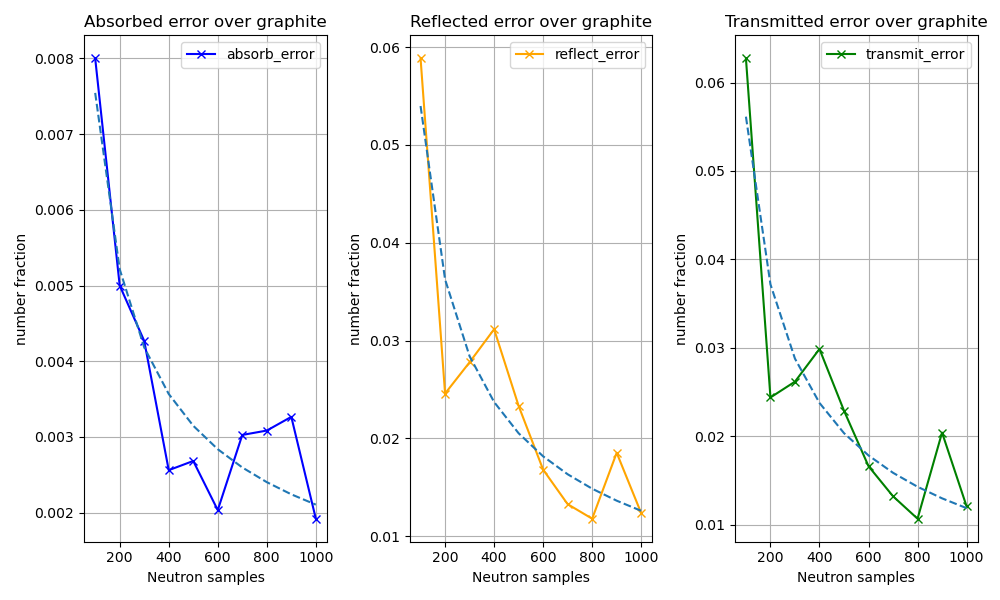

In [36]:
error_collection(water_mfp, water_absorpprob, 'water')
error_collection(lead_mfp, lead_absorpprob, 'lead')
error_collection(graphite_mfp, graphite_absorpprob, 'graphite')

The graphs for fractional errors over varying neutron numbers is plotted above for the three materials. A trendline of $1/\sqrt{N}$ is also plotted to compare the trend in drop of the data. Overall, the fractional errors for absorption, reflection and transmission decreases as the number of neutrons increases. This is the same for each material. The overall trend is what we expected, as the statistical uncertainty minimizes when more samples are generated. The decrease in data appeared to almost follow the square root formula $1/\sqrt{N}$, despite major fluctuations in our data. These are probably caused by the randomness ensued in our monte carlo samples, so that's why the errors aren't consistent most of the time.

The relation of the error over number of samples becomes exact in the limit of large number of measurements. It is signified from this relation that if the error were to reduce by a factor of 10, 100 times more points should be collected for the measurement.

# Determining the characteristic length of the material

In general, the number of neutrons transmitting out of the material is dependent on its thickness. The longer the neutron traverses, the more scattering and absorbtion process it endures. Hence, the number/ intensity of transmitted neutrons exponentially decreases over distance.
The formula of attenuation is given by $I = I_0\exp(-x/\lambda)$, which $I \propto N_T/N$. An analysis on our attenuation length $\lambda$ can be carried out by collecting the monte carlo results with varying thickness. The log of the transmitted fraction is then be computed and fitted over distance x using np.polyfit. Slope of the fit is $1/\lambda$.

In [37]:
def characteristic_length(mfp, absorb_prob, max_length, material):
    '''
    Collects all the neutrons data of absorption, reflection and transmission over varying thickness. The results
    and errors are then plotted in a graph. (10 data was used over a logarithmic space.)
    '''
    lengths = np.geomspace(1, max_length, 10)
    data = np.zeros((len(lengths), 6))
    for index, l in enumerate(lengths):
        # function that outputs the mean monte carlo results
        data[index, :] = mod_monte_carlo_mean_results(mfp, absorb_prob, l, 10000)
    
    # assigns the right type of data using indexing on our results given by mod_monte_carlo_mean_results
    absorb_data = data[:,0]
    reflect_data = data[:,1]
    transmit_data = data[:,2]
    
    absorb_err = data[:,3]
    reflect_err = data[:,4]
    transmit_err = data[:,5]
    
    # function you calculate the fraction
    a_fraction, r_fraction, t_fraction, afrac_err, rfrac_err, tfrac_err = calculate_fraction(absorb_data, 
                                                                    reflect_data, transmit_data, absorb_err, reflect_err, transmit_err)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(f'Neutron data of {material}')
    ax.errorbar(lengths, a_fraction, yerr = afrac_err, fmt = 'x', label = 'absorbed')
    ax.errorbar(lengths, r_fraction, yerr = rfrac_err, fmt = 'x', label = 'reflect')
    ax.errorbar(lengths, t_fraction, yerr = tfrac_err, fmt = 'x', label = 'transmitted')
    ax.set_xlabel('thickness (cm)')
    ax.set_ylabel('count')
    ax.legend()
    ax.grid()
    plt.show()
    return lengths, t_fraction, tfrac_err

In [38]:
def transmit_data_fit(transmit_data, transmit_error, lengths):    
    '''
    performs a fit over the transmission data and gives an optimum value of the attenuation length. A chi square
    result is also outputted along with the fit results.
    '''
    # select the transmitted data which are not zero for fit later
    condition = np.where(transmit_data != 0)
    transmit_data = transmit_data[condition]
    transmit_error = transmit_error[condition]
    lengths = lengths[condition]
    logdata, logerror = log_error_calculation(transmit_data, transmit_error)
    fitted_data = attenuation_length_calculation(lengths, logdata, logerror)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.errorbar(lengths, logdata, yerr = logerror, fmt = '.', color = 'black', capsize = 3)
    ax.plot(lengths, fitted_data, color = 'orange')
    ax.grid()
    plt.xlabel('distance (cm)')
    plt.ylabel('ln(transmission fraction)')
    plt.show()
    


# Transmission result of water

<IPython.core.display.Javascript object>


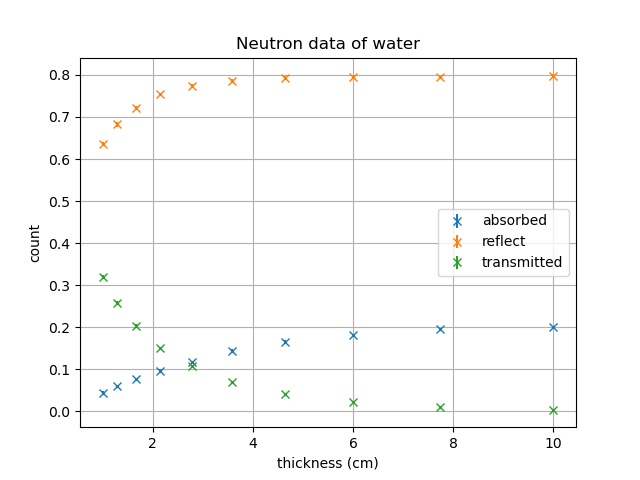

In [39]:
lengths, w_transmit, w_error = characteristic_length(water_mfp, water_absorpprob, 10, 'water')

Analysis results
The attenuation length is 1.840 +/- 0.121 cm
Reduced chi square of the fit is 6.78


<IPython.core.display.Javascript object>


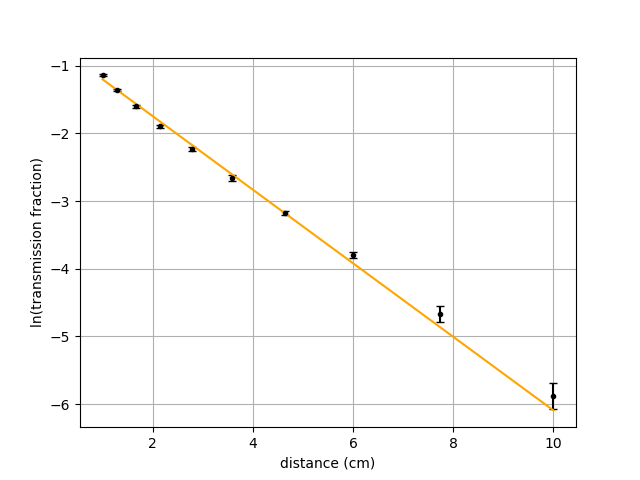

In [40]:
transmit_data_fit(w_transmit, w_error, lengths)

Based on the plot of the transmission results, we can see that water is a good reflector of neutrons. The reflected data is significantly higher than that of absorbed and transmitted. In addition, the transmitted fractiion can be seen decaying rapidly over a short distance of around 3cm. Fit results have shown $\lambda$ to be around $1.82$ cm which is reasonably short. All of these observations correlate to what we expect for water. This proves why water is still commonly used as a moderator in nuclear reactors. The transmitted data also seem to correspond to the exponential formula we had. Errors were small as they were based on a statistical uncertainty for large number of samples.

# Transmission result of lead

<IPython.core.display.Javascript object>


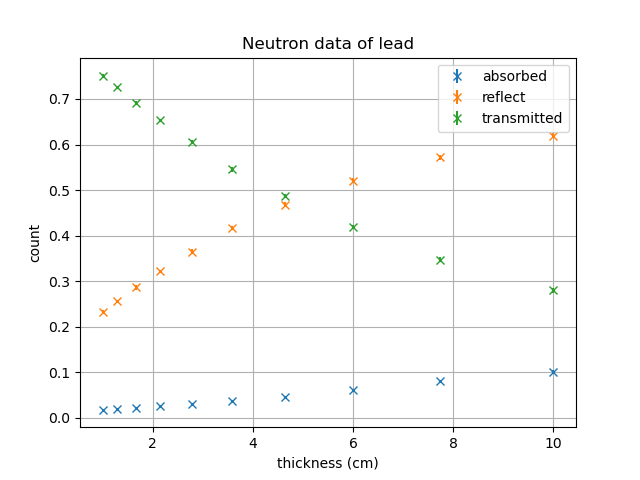

In [41]:
lengths, l_transmit, l_error = characteristic_length(lead_mfp, lead_absorpprob, 10, 'lead')

Analysis results
The attenuation length is 8.720 +/- 0.368 cm
Reduced chi square of the fit is 1.71


<IPython.core.display.Javascript object>


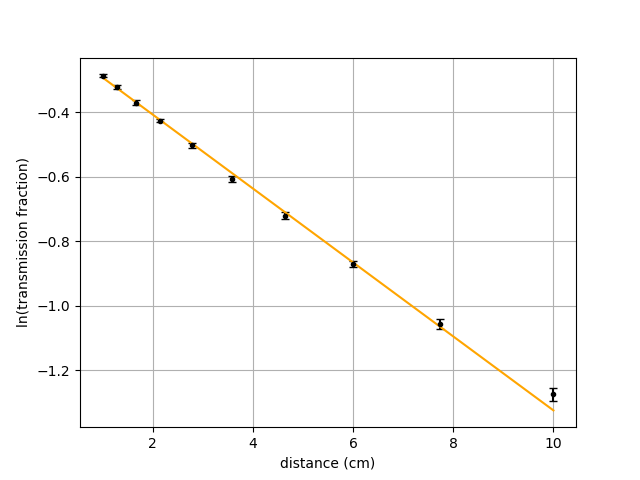

In [42]:
transmit_data_fit(l_transmit, l_error, lengths)

For lead, the transmitted data appeared to take a longer distance to decrease signficantly, implying a greater attenuation length. Fit results show that $\lambda$ be around $8.8$ cm, which was expected. Figures of reflected data were fairly big but not higher than water's due to a smaller scattering cross section. This is similiar for the absorption. Chi square fit results were reasonable and satisfactory with similiarly small errorbars as before.

# Transmission result of graphite

<IPython.core.display.Javascript object>


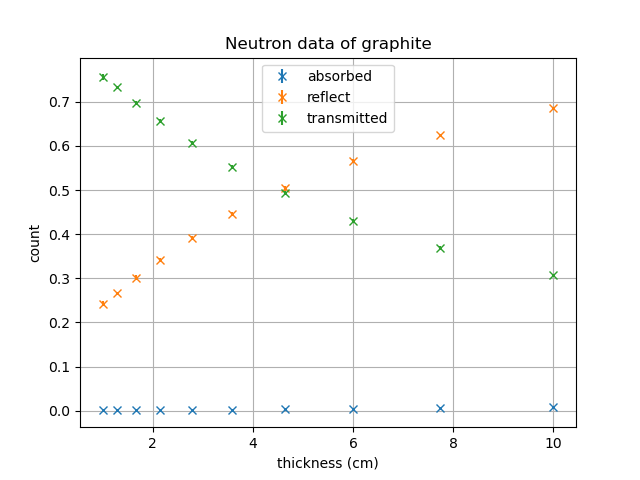

In [43]:
lengths, g_transmit, g_error = characteristic_length(graphite_mfp, graphite_absorpprob, 10, 'graphite')

Analysis results
The attenuation length is 9.518 +/- 0.992 cm
Reduced chi square of the fit is 9.73


<IPython.core.display.Javascript object>


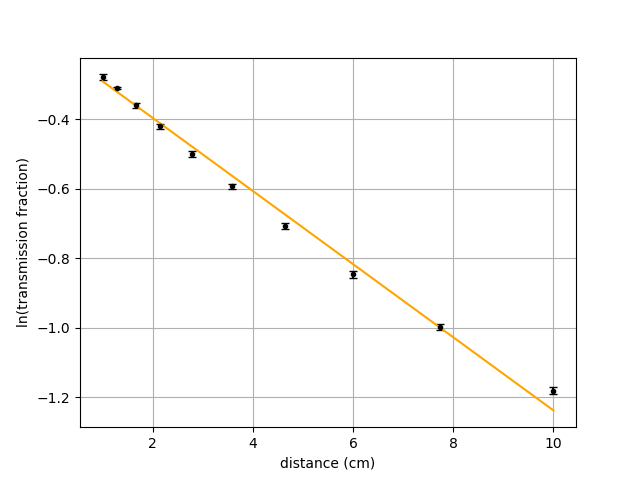

In [44]:
transmit_data_fit(g_transmit, g_error, lengths)

Based on graphite's results, the transmission of neutrons require a fair distance to drop significantly. Reflectance of material is also shown to become high at around 8-10 cm. Fit results show that the attenuation length to be around $9.5$ cm, which is similiar to lead's results. However, the reduced chi square is bit high and the data seemed to deviate slightly from the fit line. Data was taken over a large distance to get a better picture.

<ipython-input-37-1e7d455c27df>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


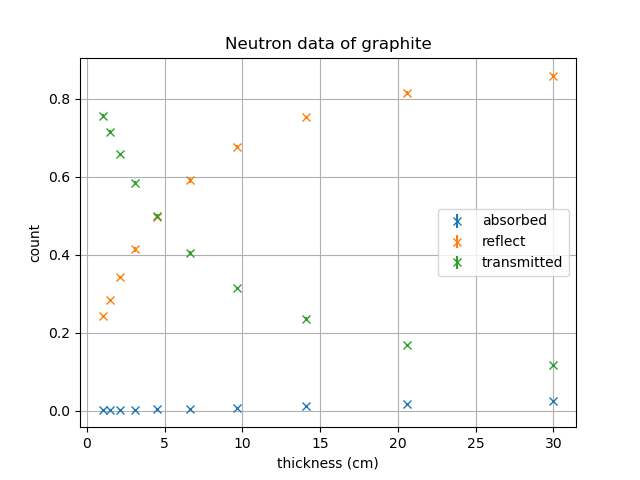

In [45]:
lengths, g_transmit, g_error = characteristic_length(graphite_mfp, graphite_absorpprob, 30, 'graphite')

Analysis results
The attenuation length is 12.703 +/- 5.286 cm
Reduced chi square of the fit is 105.26


<IPython.core.display.Javascript object>


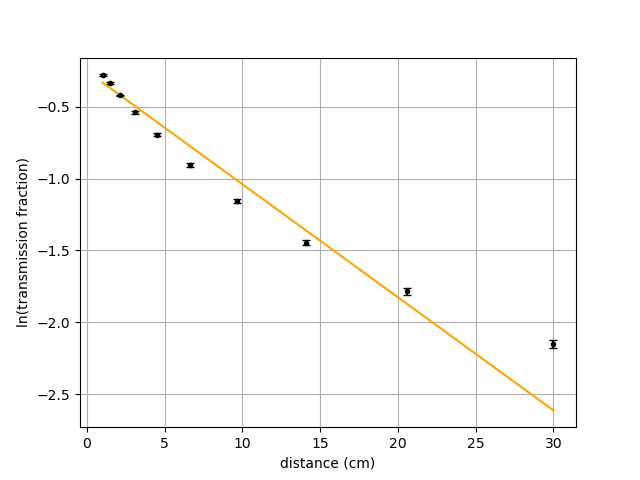

In [46]:
transmit_data_fit(g_transmit, g_error, lengths)

From the plot above, 10 data was taken across over a maximum range of 30 cm. From the fit above, the attenuation length is different from our previous value and our reduced chi square is a lot bigger. The data also deviates significantly from our fit over a large distance. This shows that the exponential formula is not sufficient to model the data for graphite. It's possible that the number of monte carlo trials generated at these distances is not enough, which underestimated the data's original error. This can be minimized if more runs of monte-carlo simulations were taken instead of 10. The accuracy of the exponential fit can then be improved. 

# Bonus: Attempt in using Woodcock method

If two slabs of material are placed next to each other (with the second slab having a smaller mean free path), the transmission process of neutrons across the slab becomes more complicated. In the middle of the boundary, there is a possibility that the neutrons step overcrosses the boundary into the second slab which no longer makes our computation accurate. This is because the step still assumes our initial mean free path is the longer one. To prevent this from happening, the woodcock method is used. Inside this method, a fictitious probability is assigned where the particle will move in the same direction and not perform any scattering. All paths of the particle is moved at the smallest mean free path to reduce any statistical bias. The fictitious probability is calculated in the following equation.

$P(f) = 1 - \dfrac{\Sigma_1}{\Sigma_T}$ 

where $\Sigma_1$ is the total cross section in slab 1, $\Sigma_T$ is the maximum cross section of the two materials. The cross sections can be calculated from the mean free paths $\lambda$ as seen in the equations in markov chain. After that, the particle will still have the same corresponding probability for absorption and scattering.

In [47]:
def fictitious_prob(mfp1, mfp2):
    '''
    Calculates the fictitious probability of a neutron travelling in the slab with the longer mean free path
    Note: mfp1 is the mean free path of first slab, which should have a larger value than mfp2.
    '''
    mfp_T = min(mfp1, mfp2)
    cross_section1 = 1/mfp1
    cross_sectionT = 1/mfp_T
    ficitious_prob = 1 - cross_section1/cross_sectionT
    return ficitious_prob


fictitious_prob(lead_mfp, water_mfp)

0.891709357411125

In [48]:
def woodcock_initial(n, mfp):
    '''
    generates initial steps for the particles as they enter the slab of the material.
    '''
    ran_no = random_no_table(0,1,n)
    magnitudes = exponential_distribution(ran_no, mfp)
    theta = np.zeros(n)
    phi = np.zeros(n)
    theta[:] = np.pi/2
    
    x = magnitudes * np.sin(theta) * np.cos(phi)
    
    return x, theta, phi

In [49]:
def fict_step(n, mfp, theta, phi):
    '''
    generates ficititious steps that move in the initial direction 
    '''
    ran_no = random_no_table(0,1,n)
    magnitudes = exponential_distribution(ran_no, mfp)
    return magnitudes * np.sin(theta) * np.cos(phi)

In [50]:
def woodcock_step(n, mfp):
    '''
    generates scattering steps for the woodcock method
    '''
    ran_no = random_no_table(0, 1, n)
    magnitudes = exponential_distribution(n, mfp)
    u_i = random_no_table(0, 1, n)
    theta = low_concentrate_theta(u_i)
    phi = random_no_table(0, np.pi * 2, n)
    x = magnitudes * np.sin(theta) * np.cos(phi)
    
    return x, theta, phi

In [51]:
def woodcock(lambda_1, lambda_2, absorb_prob1, absorb_prob2, slab_length, n):
    '''
    performs the woodcock method over samples of neutrons, which accounts for the fictitious method
    '''
    
    transmission_mfp = min(lambda_1, lambda_2)
    # calculates the initial steps of the particle as they entered the slab as well as the fictitious probability
    x, theta, phi = woodcock_initial(n, transmission_mfp)
    fictitious = fictitious_prob(lambda_1, lambda_2)
    absorb_count = 0
    reflect_count = 0
    transmitted_count = 0

    boundary_position = 10
    while len(x) > 0:
        # filters out data that perform the fictitious steps and real steps in slab 1, and ones that are in slab 2
        slab_1 = np.argwhere(x < boundary_position)
        prob = random_no_table(0, 1, len(x[slab_1]))
        fictitious_index = slab_1[np.argwhere(prob < fictitious)]
        real_index1 = slab_1[np.argwhere(prob > fictitious)]
        real_index2 = np.argwhere(x > boundary_position)
        
        # adds fictitious steps to data that has the associated probability
        x[fictitious_index] += fict_step(len(x), transmission_mfp, theta, phi)[fictitious_index]
        prob1 = random_no_table(0, 1, len(x[real_index1]))
        prob2 = random_no_table(0, 1, len(x[real_index2]))
        # filters data that have a scattering probability and assigned new steps and angles to them
        scattered_1 = real_index1[np.argwhere(prob1 > absorb_prob1)]
        scattered_2 = real_index2[np.argwhere(prob2 > absorb_prob2)]
        step, new_theta, new_phi = woodcock_step(len(x), transmission_mfp)
        # add all the scattered steps
        x[scattered_1] += step[scattered_1]
        x[scattered_2] += step[scattered_2]
        theta[scattered_1] = new_theta[scattered_1]
        theta[scattered_2] = new_theta[scattered_2]
        phi[scattered_1] = new_phi[scattered_1]
        phi[scattered_2] = new_phi[scattered_2]        
        
        # checks which data gets absorbed and add them to the count while deleting them after that
        absorbtion_index1 = real_index1[np.argwhere(prob1 < absorb_prob1)]
        absorbtion_index2 = real_index2[np.argwhere(prob2 < absorb_prob2)]
        absorbtion_index = np.append(absorbtion_index1, absorbtion_index2)
        absorb_count += len(x[absorbtion_index])
        x = np.delete(x, absorbtion_index)
        theta = np.delete(theta, absorbtion_index)
        phi = np.delete(phi, absorbtion_index)
        
        # checks which data gets reflected and add them to the count
        reflected_index = np.argwhere(x < 0)
        reflect_count += len(x[reflected_index])
        x = np.delete(x, reflected_index)
        theta = np.delete(theta, reflected_index)
        phi = np.delete(phi, reflected_index)
        
        # checks which data gets transmitted and add them to the count
        transmit_index = np.argwhere(x > slab_length)
        transmitted_count += len(x[transmit_index])
        x = np.delete(x, transmit_index)
        theta = np.delete(theta, transmit_index)
        phi = np.delete(phi, transmit_index)
    
    return absorb_count, reflect_count, transmitted_count

In [52]:
woodcock(lead_mfp, water_mfp, lead_absorpprob, water_absorpprob, 20, 10000)

(1868, 7168, 964)

Here a test with one monte carlo simulation with the woodcock method is done with lead as the first slab and water as the second slab. Our count shows the majority of neutrons to be reflected, which is around 70% . However our results do not add up, as the expected transmission of particle should be lower. Based on the result for 10cm of water, the transmission fraction was about 0.3% but the transmitted result shown by woodcock method was about 10%. This suggests our model of woodcock method is inaccurate.

In [54]:
woodcock(1000, water_mfp, 0, water_absorpprob, 20, 10000)

(3241, 63, 6696)

A model where vacuum is placed along with water is computed. Again, this clearly shows the model to be inaccurate since the number of transmission is extremely high. This model should be similiar to a case of neutron transport through water of 10cm thickness, with 0.3% transmitted. 

It is quite possible that the fictitious steps were not added properly or the reflected scattering is underestimated, leading to many cases of the particle being transported through the material. The code for the woodcock method should be properly checked thoroughly and changed to account for these changes. However due to the time constraints and this section being a bonus, not much advancement was made in this section. 

# Conclusion

The results obtained through collecting the mean results of monte carlo simulation were satisfactory. Transmission data of water was shown to be the smallest out of all three materials, with a small attenuation length. This aligned to our expectations with water having the highest scattering cross section. The coding results also shows why water is a common material used as a reflector and moderator due to its scattering properties. Both lead and graphite's results were fairly good in moderate transmission based on its plot and fit, which makes them ideal materials as moderators for controlling the fission rate. Graphite's results however needs more adjustment to the model and number of samples used in order for a more accurate result.

The investigation into Monte-Carlo methods was also thoroughly studied as well. Errors of our simulation were shown to decrease significantly as $1/\sqrt{N}$ over larger sizes of samples. The computational runtime of our monte-carlo simulation was also significantly reduced by incorporating arrays instead of iterating through for loops. The exploration through Woodcock method was sadly not enough due to time constraints. The code and model should be modified for improvement in those corresponding results.